In [1]:
! python2 -c 'print(hash("Hello"))' && python2 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))' && python3 -c 'print(hash("Hello"))'

468330442038187741
468330442038187741
2827160111998155570
2380012681024949324


In [2]:
import matplotlib.pyplot as plt

In [3]:
part= "part-0"
k1 =11779
a = """0.85-0-tc-nets.pickle 621
0.8699999999999999-0-tc-nets.pickle 534
0.89-0-tc-nets.pickle 450
0.9099999999999999-0-tc-nets.pickle 354
0.93-0-tc-nets.pickle 289
0.95-0-tc-nets.pickle 210
0.2-0-tc-nets.pickle 4272
0.4-0-tc-nets.pickle 3207
0.6-0-tc-nets.pickle 2101"""

In [4]:
def convert_output(output):
    res3 = dict()
    for r in output.split('\n'):
        g = float(r.split('-')[0])
        siz=int(r.split(' ')[-1])
        res3[g] = siz
    
    return dict(sorted(res3.items()))
    

In [5]:
res = convert_output(output=a)

## two partitions merged together

In [6]:
b = """0.8-1-tc-nets.pickle 1204
0.95-1-tc-nets.pickle 249
0.8699999999999999-1-tc-nets.pickle 730
0.93-1-tc-nets.pickle 332
0.9099999999999999-1-tc-nets.pickle 464
0.89-1-tc-nets.pickle 593
0.85-1-tc-nets.pickle 867
0.6-1-tc-nets.pickle 3255
0.2-1-tc-nets.pickle 7442
0.4-1-tc-nets.pickle 5404"""
k2=23558

In [7]:
res2 = convert_output(b)

## Part 4 results

In [8]:
c="""0.85-1-tc-nets.pickle 1182
0.89-1-tc-nets.pickle 774
0.8-1-tc-nets.pickle 1722
0.4-1-tc-nets.pickle 9012
0.6-1-tc-nets.pickle 5092
0.2-1-tc-nets.pickle 12796
0.93-1-tc-nets.pickle 442
0.9099999999999999-1-tc-nets.pickle 583
0.8699999999999999-1-tc-nets.pickle 969
0.95-1-tc-nets.pickle 307"""
k3 = 47116

In [9]:
res3 = convert_output(c)

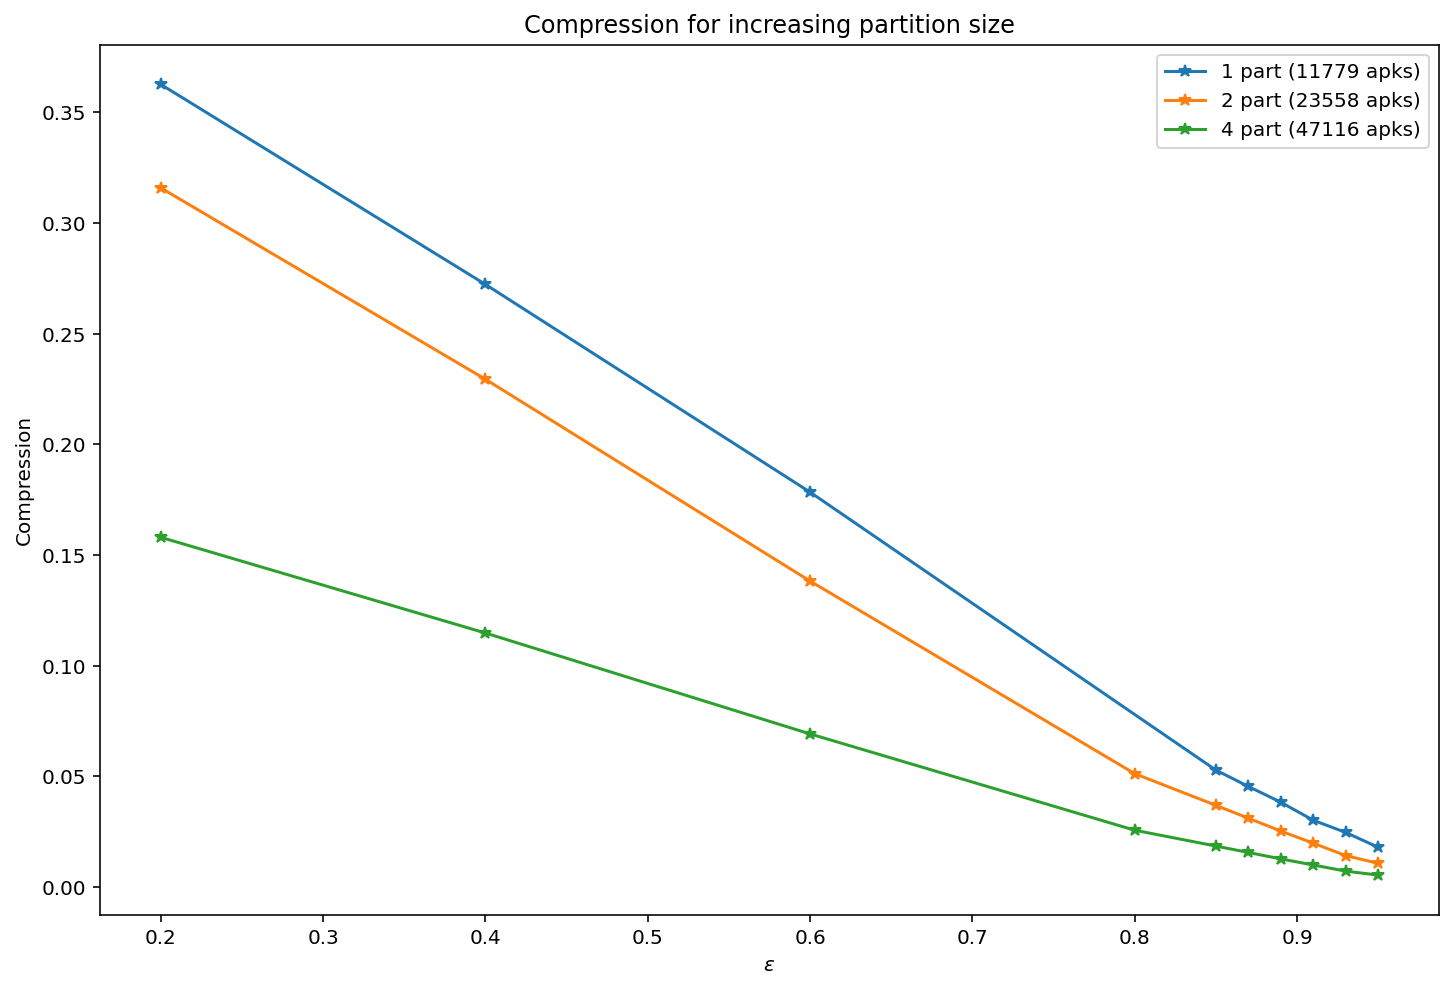

In [10]:
plt.figure(figsize=(12,8))
plt.title(f"Compression for increasing partition size")
plt.xlabel(f"$\epsilon$")
plt.ylabel('Compression')

plt.plot(res.keys(), list(map(lambda x: x/k1, res.values())),'-*', label=f"1 part ({k1} apks)");
plt.plot(res2.keys(), list(map(lambda x: x/k2, res2.values())),'-*', label=f"2 part ({k2} apks)");
plt.plot(res3.keys(), list(map(lambda x: x/k3, res2.values())),'-*', label=f"4 part ({k3} apks)");


plt.legend();


In [11]:
## Network merging

> 2021-05-16 15:08:07,218 root INFO Loading networks 0.85

> 2021-05-16 15:08:08,165 root INFO Starting to merge 16 nets with gamma=0.85

> 2021-05-16 15:16:45,158 root INFO Starting network creation with k=10217

> 2021-05-16 15:23:37,005 root INFO Saved network with 1999

In [11]:
## Prec-recall for streamed network

In [17]:
#import graphlab as tc
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
import pickle
import turicreate as tc
import pandas as pd

In [41]:
def read_and_conv(fname, labels):
    with open(fname, 'rb') as f:
        eres = pickle.load(f)
    tblre = dict()
    for r, val in eres:
        tblre[r['apk']] = [r['nn'], val, not labels.loc[r['apk']]['malware_label']]
    return pd.DataFrame.from_dict(tblre, orient='index', columns=[ 'nearest', 'prob', 'true_val'])

In [43]:
fname='../res/newclusterres/neweval-65.pickle'
labels = pd.read_csv('../res/newclusterres/apks_labels_hashed.csv', index_col=0)

In [51]:
df = read_and_conv(fname=fname, labels=labels)
df2 = read_and_conv(fname='../res/newclusterres/neweval-85.pickle', labels=labels)
#df3 = read_and_conv(fname='../res/newclusterres/smallk-evalresults.pickle', labels=labels)

In [52]:
[p1, r1, thresholds] = precision_recall_curve(df['true_val'], df['prob'])
auc1 = auc(r1, p1)
[p2, r2, thresholds] = precision_recall_curve(df2['true_val'], df2['prob'])
auc2 = auc(r2, p2)


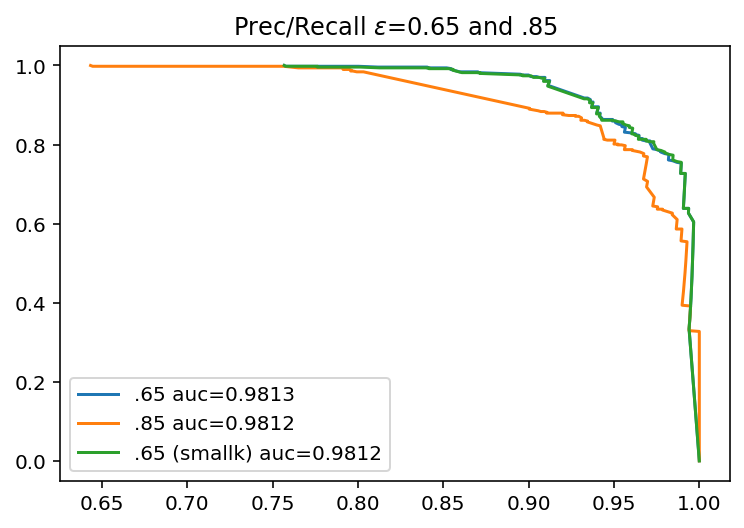

In [53]:
plt.title(f"Prec/Recall $\epsilon$=0.65 and .85")
plt.plot(p1, r1, label=f".65 auc={auc1:.4f}")
plt.plot(p2, r2, label=f".85 auc={auc2:.4f}")
#plt.plot(p3, r3, label=f".65 (smallk) auc={auc2:.4f}")

plt.legend();